### Christian Jay Baguio 
### DS3A
#### Data Mining and Application

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('iris-1.csv')
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [ ]:
#check for possible nan values
df.isna().sum()

In [ ]:
df.describe()

In [ ]:
df[df.species == 'setosa'].head()

In [ ]:
df[df.species == 'versicolor'].head()

In [ ]:
df[df.species == 'virginica'].head()

In [3]:
#Split the rows into 3S
df_0 = df[:50]
df_1 = df[50:100] 
df_2 = df[100:]

# Sepal Length vs Sepal Width (Setosa vs Versicolor vs Virginica)

Text(0, 0.5, 'Sepal Width')

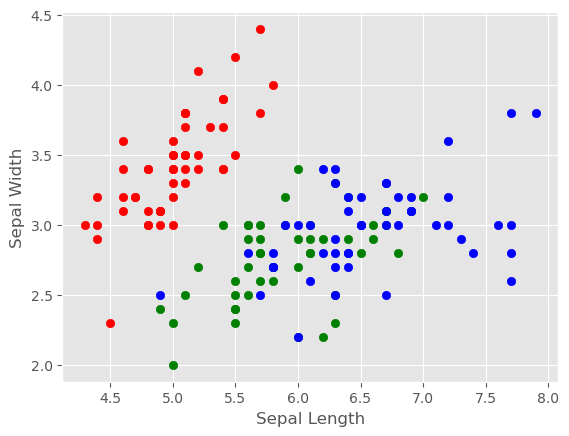

In [4]:
plt. scatter(df_0['sepalLength'], df_0['sepalWidth'], color = 'red') #Setosa
plt. scatter(df_1['sepalLength'], df_1['sepalWidth'], color = 'green') #Versicolor
plt. scatter(df_2['sepalLength'], df_2['sepalWidth'], color = 'blue') #Virginica
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Petal Length vs Petal Width (Setosa vs Versicolor vs Virginica)

Text(0, 0.5, 'Petal Width')

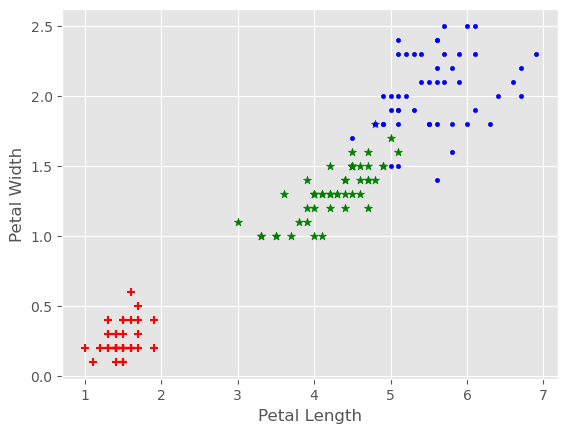

In [9]:
plt.scatter(df_0['petalLength'], df_0['petalWidth'], color = 'red', marker = '+') #Setosa
plt.scatter(df_1['petalLength'], df_1['petalWidth'], color = 'green', marker = '*') #Versicolor
plt.scatter(df_2['petalLength'], df_2['petalWidth'], color = 'blue', marker = '.') #Virginica
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Adding new instance to the plot


Text(0, 0.5, 'Petal Width')

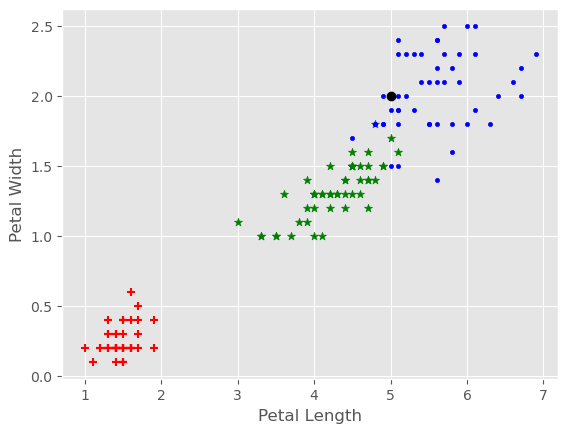

In [10]:
petalLength_instance = [5.0]
petalWidth_instance = [2.0]

plt.plot(petalLength_instance, petalWidth_instance, color = 'black', marker = 'o') #New instance
plt.scatter(df_0['petalLength'], df_0['petalWidth'], color = 'red', marker = '+') #Setosa
plt.scatter(df_1['petalLength'], df_1['petalWidth'], color = 'green', marker = '*') #Versicolor
plt.scatter(df_2['petalLength'], df_2['petalWidth'], color = 'blue', marker = '.') #Virginica
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Data train and split

In [31]:
X = df.iloc[:, 2:-1].values #Get the 2 columns for petal
y  = df.iloc[:, 4].values #Get the attribute

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

# Create a Scaler for the data to normalize it

In [27]:
'''Scaler = StandardScaler()
Scaler.fit(X_train) #fit the train data into the scaler
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)'''

'Scaler = StandardScaler()\nScaler.fit(X_train) #fit the train data into the scaler\nX_train = Scaler.transform(X_train)\nX_test = Scaler.transform(X_test)'

# Apply KNN algorithm

In [38]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric='euclidean') #given assign K value which is 9
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [39]:
classifier.score(X_test, y_test) #check if the score is low or high

0.9666666666666667

# Make predictions

In [40]:
X_pred = classifier.predict(X_test) #predict for x test
X_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [41]:
y_predict = classifier.predict([[5.0, 2.0]]) #predict given new instance
y_predict

array(['virginica'], dtype=object)

In [48]:
classifier.predict([[4.0, 1.5]])

array(['versicolor'], dtype=object)

In [42]:
print(classifier.predict_proba([[5.0, 2.0]])) #predict probability given new instance


[[0. 0. 1.]]


# Evaluate the Algorithm

Text(0, 0.5, 'Petal Width')

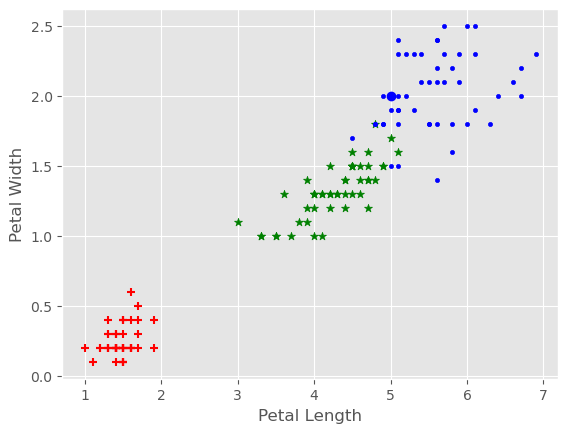

In [24]:
plt.plot(petalLength_instance, petalWidth_instance, color = 'blue', marker = 'o') #new instance
plt.scatter(df_0['petalLength'], df_0['petalWidth'], color = 'red', marker = '+') #Setosa
plt.scatter(df_1['petalLength'], df_1['petalWidth'], color = 'green', marker = '*') #Versicolor
plt.scatter(df_2['petalLength'], df_2['petalWidth'], color = 'blue', marker = '.') #Virginica
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [43]:
print(classification_report(y_test, X_pred))
cm = confusion_matrix(y_test, X_pred)
print(cm)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


Text(50.722222222222214, 0.5, 'Truth')

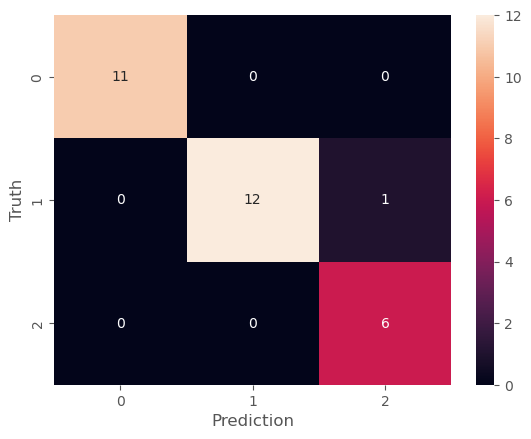

In [44]:
#truth table
sns.heatmap(cm, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
y_predict.shape

In [45]:
neighbors = [[2.0, 1.0]]

distances, indices = classifier.kneighbors(neighbors) #determine the distance of each neighbor


print(f'K-Nearest Neighbors:')
for i in range(len(indices[0])):
    neighbor_index = indices[0][i]
    print(f'Neighbor {i+1}: Distance={distances[0][i]:.2f}')

K-Nearest Neighbors:
Neighbor 1: Distance=0.57
Neighbor 2: Distance=0.58
Neighbor 3: Distance=0.72
Neighbor 4: Distance=0.76
Neighbor 5: Distance=0.78
Neighbor 6: Distance=0.78
Neighbor 7: Distance=0.81
Neighbor 8: Distance=0.85
Neighbor 9: Distance=0.89
